## **Sales prediction using your advertising data**

### **1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/advertising.csv')
print(df.head(200))

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [5]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


### **2. Data Inspection**

In [6]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [7]:
print(df.duplicated().sum())

0


### **3. Data Cleaning**

In [8]:
df=df.drop_duplicates()
df=df.dropna()

### **4. Exploratory Data Analysis(EDA)**

<function matplotlib.pyplot.show(close=None, block=None)>

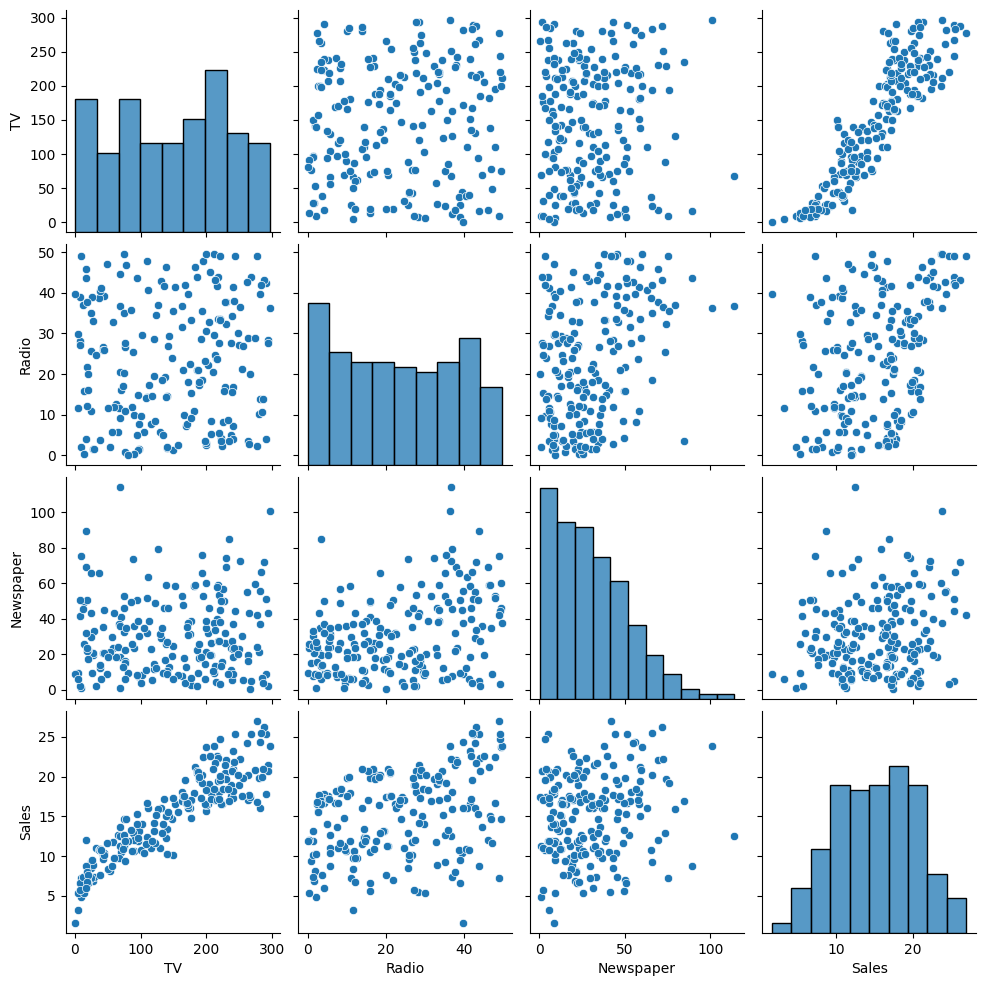

In [9]:
sns.pairplot(df)
plt.show

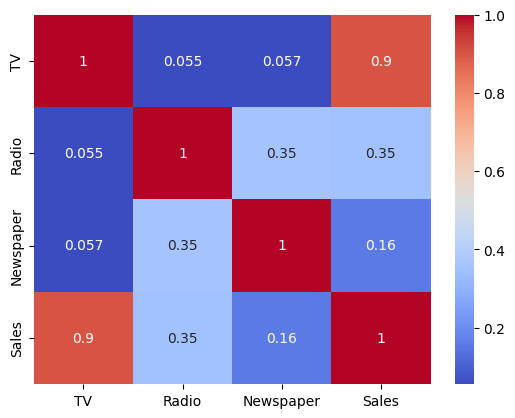

In [10]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.show()

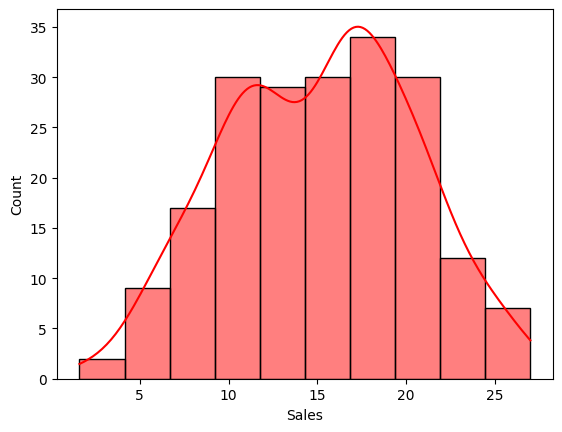

In [11]:
sns.histplot(df['Sales'], kde=True,color='red')
plt.show()

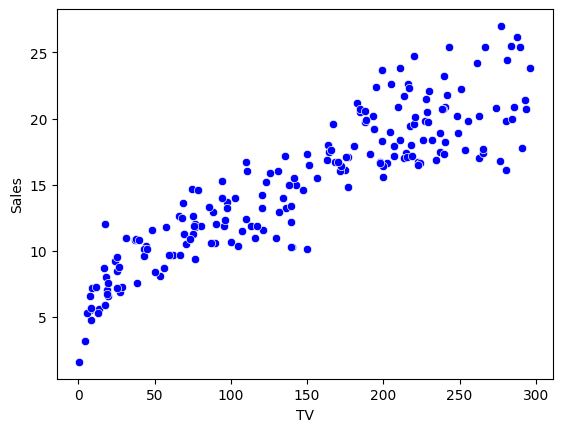

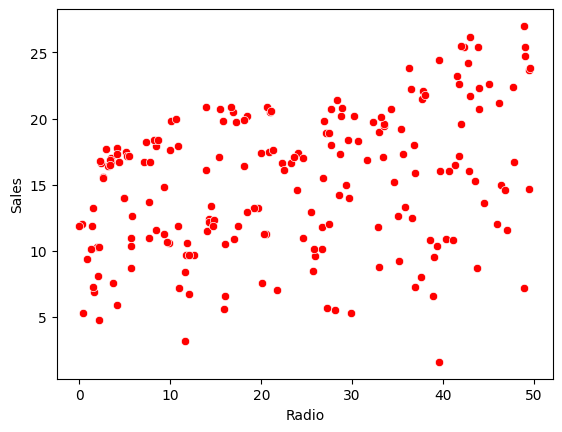

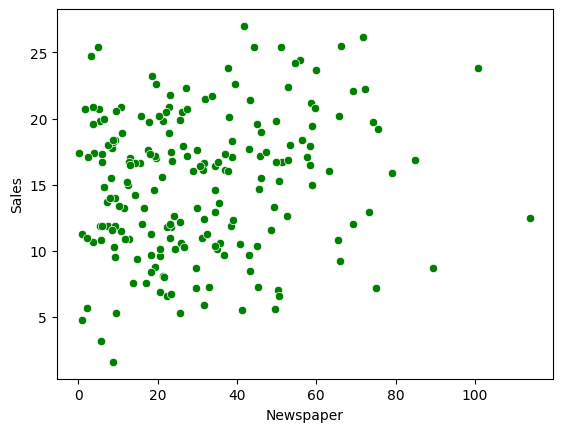

In [12]:
sns.scatterplot(x='TV',y='Sales', data=df, color='blue')
plt.show()
sns.scatterplot(x='Radio',y='Sales', data=df, color='red')
plt.show()
sns.scatterplot(x='Newspaper',y='Sales', data=df,color='green')
plt.show()

### **5. Model Building (Simple Linear Regression)**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X=df[['TV','Radio','Newspaper']]
y=df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_test)

###**6. Generic Steps in Model Building using statsmodels**

In [14]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr_sm=sm.OLS(y_train,X_train_sm).fit()
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     374.3
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           1.69e-65
Time:                        19:14:57   Log-Likelihood:                -271.70
No. Observations:                 140   AIC:                             551.4
Df Residuals:                     136   BIC:                             563.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7438      0.400     11.863      0.0

###**7. Model Evaluation**

Mean Squared Error: 2.541624036229147
R-squared: 0.9091484341849799


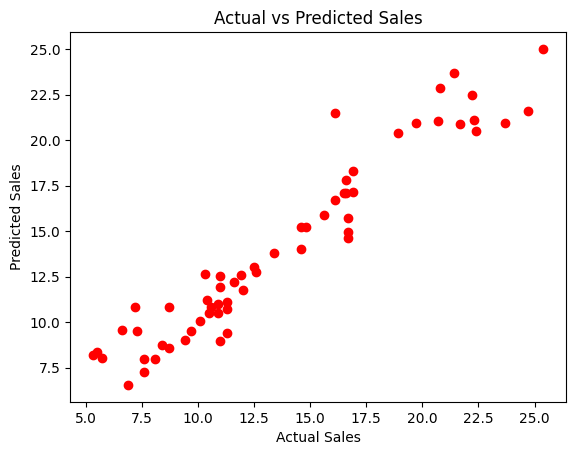

In [16]:
y_test_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_test_pred)
r2=r2_score(y_test,y_test_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test,y_test_pred,color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

###**8. Predictions on the Test set**


     Actual Sales  Predicted Sales
95           16.9        17.159919
15           22.4        20.533695
30           21.4        23.689144
158           7.3         9.519146
128          24.7        21.607368


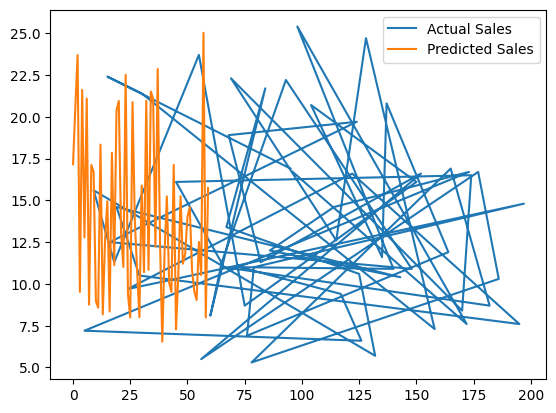

In [18]:
predictions=pd.DataFrame({'Actual Sales':y_test,'Predicted Sales':y_test_pred})
print(predictions.head())

plt.plot(y_test, label='Actual Sales')
plt.plot(y_test_pred, label='Predicted Sales')
plt.legend()
plt.show()